In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv('/home/sourav/Downloads/Admission_Predict.csv')
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [3]:
print(df.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [4]:
print(df.describe())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.34000

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None


In [6]:
print(df.corr(method='pearson'))

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   
Chance of Admit      0.042336   0.802610     0.791594           0.711250   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138          0.042336  
GRE Score          0.612831  0.557555  0.833060  0.580391          0.802610  
TOEFL

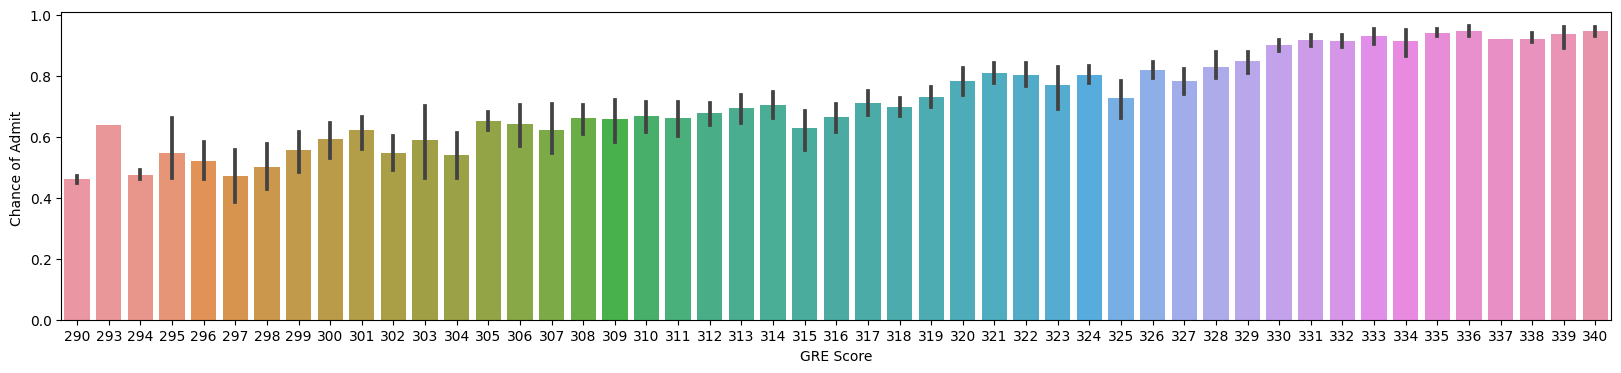

In [8]:
plt.subplots(figsize=(20,4))
sns.barplot(x="GRE Score",y="Chance of Admit ",data=df) 
plt.savefig('GRE_Score_plot.png') 

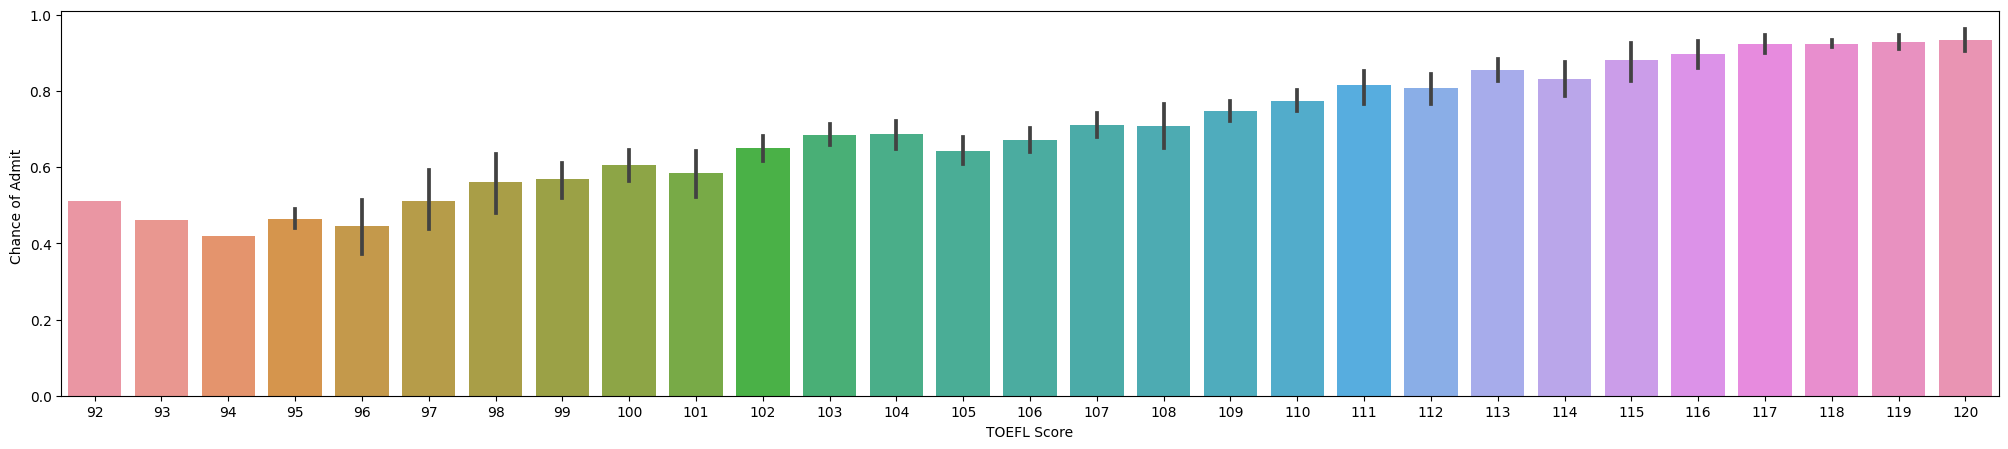

In [9]:
plt.subplots(figsize=(25,5))
sns.barplot(x="TOEFL Score",y="Chance of Admit ",data=df)
plt.savefig('TOEFL_Score_plot.png')

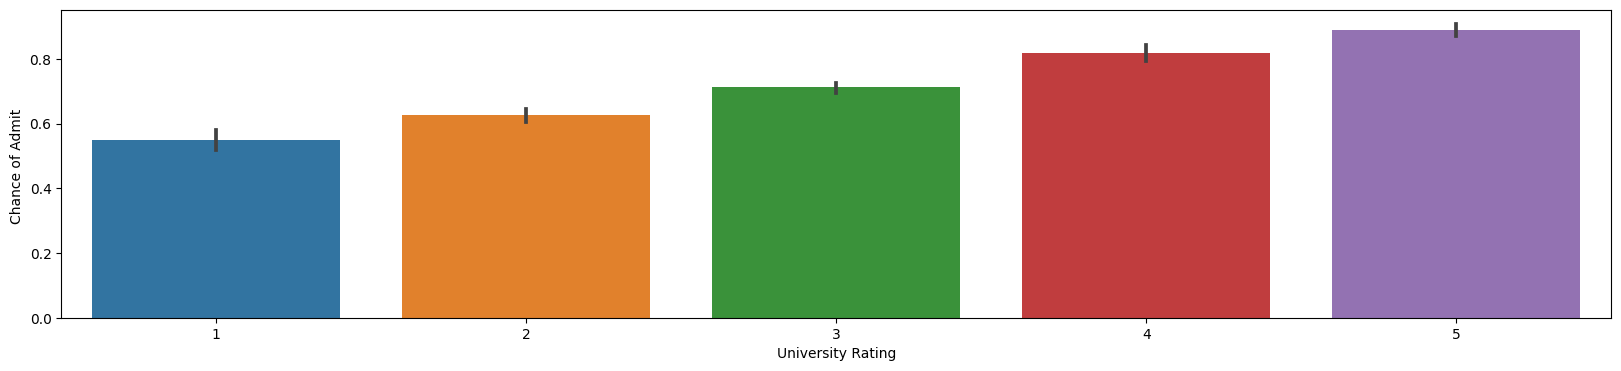

In [10]:
plt.subplots(figsize=(20,4))
sns.barplot(x="University Rating",y="Chance of Admit ",data=df)
plt.savefig('University_Rating_plot.png')

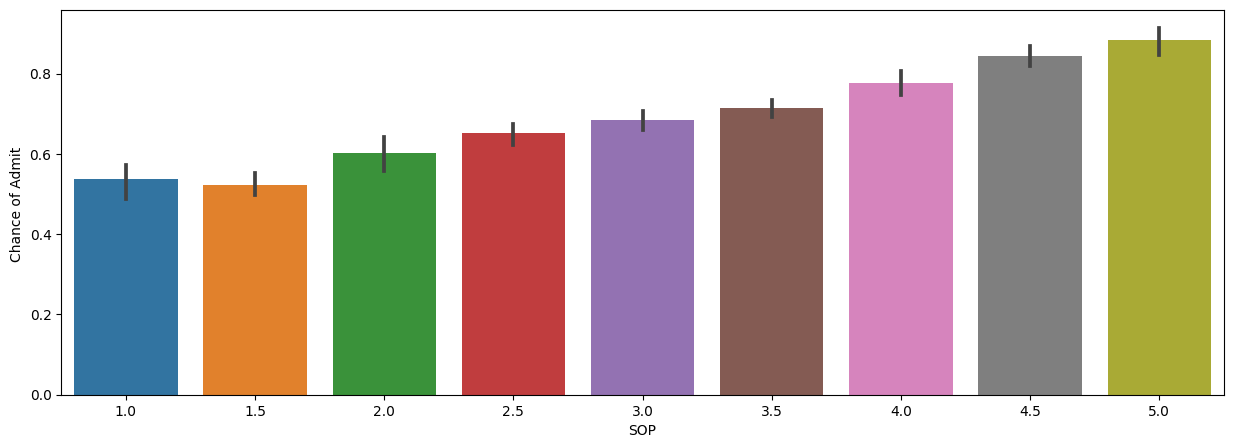

In [11]:
plt.subplots(figsize=(15,5))
sns.barplot(x="SOP",y="Chance of Admit ",data=df)
plt.savefig('SOP_plot.png')

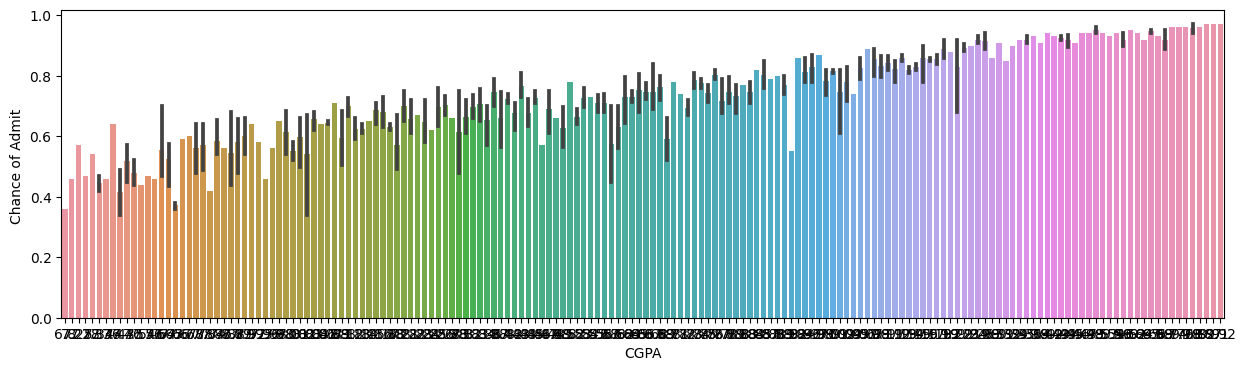

In [12]:
plt.subplots(figsize=(15,4))
sns.barplot(x="CGPA",y="Chance of Admit ",data=df)
plt.savefig('CGPA_plot.png')

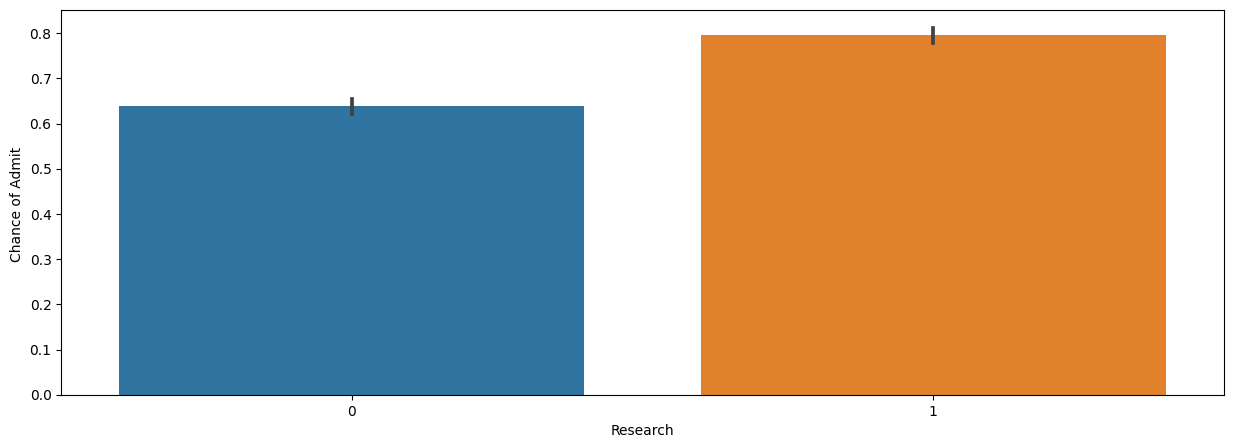

In [13]:
plt.subplots(figsize=(15,5))
sns.barplot(x="Research",y="Chance of Admit ",data=df)
plt.savefig('Research_plot.png')

In [14]:
X = df.iloc[:,1:8] #independent features (excluded the first column
y = df["Chance of Admit "] #dependent variable
print(X.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1
4        314          103                  2  2.0   3.0  8.21         0


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
pred_chance_of_admit = pd.DataFrame({ 'Predicted': y_pred})

In [20]:
compare_chance_of_admit = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(compare_chance_of_admit)

     Actual  Predicted
398    0.67   0.722694
125    0.64   0.694132
328    0.80   0.788645
339    0.81   0.782160
172    0.86   0.853434
..      ...        ...
347    0.42   0.441130
41     0.49   0.659061
180    0.71   0.614480
132    0.71   0.704706
224    0.67   0.606111

[80 rows x 2 columns]


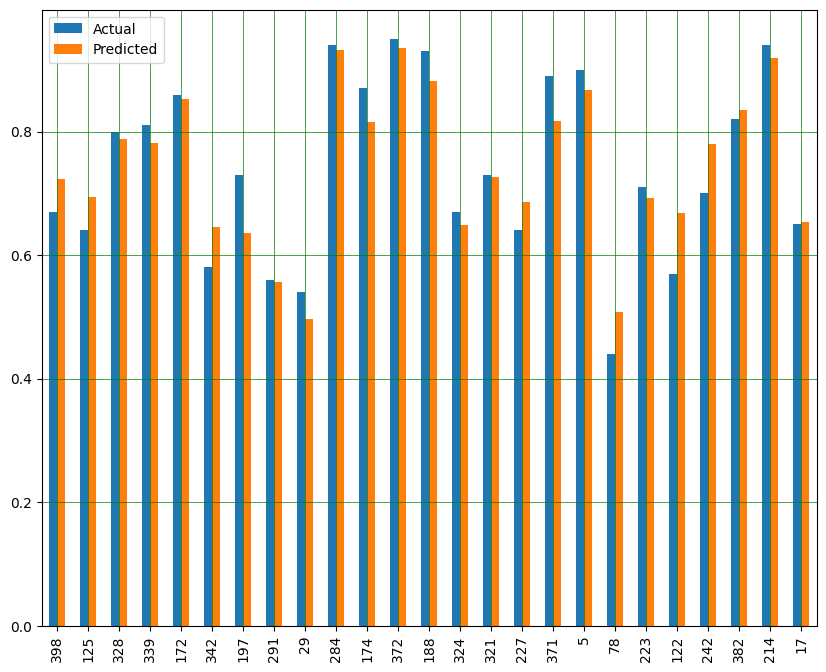

In [21]:
df = compare_chance_of_admit.head(25)
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('actual_and_predicted_chance_of_admit.png')

In [22]:
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

80.79043677020101 %
